In [ ]:
!pip install basedosdados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import basedosdados as bd

In [ ]:
reservatorio = bd.read_table(dataset_id='br_ana_reservatorios',
table_id='sin',
billing_project_id="1021231706388")
reservatorio.head()

Downloading: 100%|██████████| 1157621/1157621 [02:05<00:00, 9200.23rows/s]


,data,id_reservatorio,nome_reservatorio,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
0,2000-01-01,19001,CAMARGOS,906.43,222.10,89.0,0.0,NaN,180.27,40.10,NaN
1,2000-01-02,19001,CAMARGOS,906.64,296.77,172.0,0.0,NaN,266.90,41.71,NaN
2,2000-01-03,19001,CAMARGOS,906.89,361.46,211.0,0.0,NaN,314.91,43.64,NaN
3,2000-01-04,19001,CAMARGOS,907.30,461.70,208.0,0.0,NaN,337.97,46.90,NaN
4,2000-01-05,19001,CAMARGOS,907.64,416.50,204.0,0.0,NaN,356.68,49.64,NaN


In [ ]:
reservatorio['nome_reservatorio'].unique()

array(['CAMARGOS', 'ITUTINGA', 'FUNIL-MG', 'FURNAS', 'M. MORAES',
       'L. C. BARRETO', 'JAGUARA', 'IGARAPAVA', 'VOLTA GRANDE',
       'P. COLOMBIA', 'CACONDE', 'E. DA CUNHA', 'LIMOEIRO', 'MARIMBONDO',
       'A. VERMELHA', 'S.DO FACÃO', 'EMBORCAÇÃO', 'NOVA PONTE', 'MIRANDA',
       'C.BRANCO-1', 'C.BRANCO-2', 'CORUMBA-4', 'CORUMBA-3', 'CORUMBA',
       'ITUMBIARA', 'C. DOURADA', 'SÃO SIMÃO', 'CACU', 'B.COQUEIROS',
       'FOZ DO RIO CLARO', 'SALTO', 'S.R.VERDINHO', 'ESPORA',
       'I. SOLTEIRA', 'HENRY BORDEN', 'BILLINGS', 'GUARAPIRANGA',
       'PONTE NOVA', 'EDGARD SOUZA', 'B. BONITA', 'BARIRI', 'IBITINGA',
       'PROMISSÃO', 'N. AVANHANDAVA', 'TRÊS IRMÃOS', 'JUPIA',
       'PORTO PRIMAVERA', 'JURUMIRIM', 'PIRAJU', 'CHAVANTES', 'OURINHOS',
       'SALTO GRANDE CS', 'CANOAS II', 'CANOAS I', 'CAPIVARA',
       'TAQUARUÇU', 'ROSANA', 'ITAIPU', 'G. B. MUNHOZ', 'SEGREDO',
       'SANTA CLARA-PR', 'FUNDÃO', 'JORDÃO', 'SALTO SANTIAGO',
       'SALTO OSORIO', 'SALTO CAXIAS', 'BARRA GRAN

In [ ]:
reservatorio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157621 entries, 0 to 1157620
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   data                   1157621 non-null  dbdate 
 1   id_reservatorio        1157621 non-null  object 
 2   nome_reservatorio      1157621 non-null  object 
 3   cota                   1033391 non-null  float64
 4   afluencia              1106928 non-null  float64
 5   defluencia             1105271 non-null  float64
 6   vazao_vertida          1041768 non-null  float64
 7   vazao_turbinada        771991 non-null   float64
 8   vazao_natural          1152156 non-null  float64
 9   proporcao_volume_util  497909 non-null   float64
 10  vazao_incremental      667064 non-null   float64
dtypes: dbdate(1), float64(8), object(2)
memory usage: 97.2+ MB


In [ ]:
reservatorio['data'] = pd.to_datetime(reservatorio['data'])
reservatorio['Ano'] = reservatorio['data'].dt.year
reservatorio.head()

,data,id_reservatorio,nome_reservatorio,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental,Ano
0,2000-01-01,19001,CAMARGOS,906.43,222.10,89.0,0.0,NaN,180.27,40.10,NaN,2000
1,2000-01-02,19001,CAMARGOS,906.64,296.77,172.0,0.0,NaN,266.90,41.71,NaN,2000
2,2000-01-03,19001,CAMARGOS,906.89,361.46,211.0,0.0,NaN,314.91,43.64,NaN,2000
3,2000-01-04,19001,CAMARGOS,907.30,461.70,208.0,0.0,NaN,337.97,46.90,NaN,2000
4,2000-01-05,19001,CAMARGOS,907.64,416.50,204.0,0.0,NaN,356.68,49.64,NaN,2000


In [ ]:
reservatorio.groupby('Ano').mean()

,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
Ano,,,,,,,,
2000,449.780956,929.269966,919.323915,169.036601,1116.341421,1067.671426,46.609102,NaN
2001,415.994673,734.426469,737.637077,100.756842,832.469362,810.484518,47.889744,266.425370
2002,446.705607,746.816763,833.130033,135.602601,278.215464,935.410448,56.740838,324.993490
2003,448.323744,763.821648,779.337776,75.564391,212.224779,858.364308,57.662721,238.508645
2004,449.066315,830.498214,788.753482,121.833460,232.681916,1045.324063,60.584460,78.860098
2005,429.701174,865.136647,832.736741,155.462538,175.162085,991.137035,65.076650,83.069249
2006,448.809879,841.645875,828.261106,101.380034,776.697250,970.073634,62.292644,216.065143
2007,448.926174,905.282835,879.710555,154.772450,799.382876,1031.512795,68.122914,252.053589
2008,443.480821,796.177613,773.847534,53.581084,732.960553,996.124619,63.928555,243.865172


In [ ]:
reservatorio.groupby('Ano').median()

,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
Ano,,,,,,,,
2000,431.360,265.470,275.875,0.0,544.325,268.460,45.880,NaN
2001,403.665,263.000,271.000,0.0,345.460,238.685,45.470,49.385
2002,430.230,223.000,304.000,0.0,197.000,240.110,60.960,36.480
2003,430.885,229.100,259.000,0.0,172.000,205.000,60.435,55.600
2004,430.340,220.490,214.505,0.0,157.350,239.000,66.940,14.280
2005,403.740,235.760,231.440,0.0,100.245,258.070,72.500,14.520
2006,427.450,236.000,240.290,0.0,199.000,205.000,66.165,73.250
2007,430.840,239.000,254.000,0.0,322.000,212.000,71.210,67.150
2008,427.270,254.000,258.000,0.0,299.000,232.670,66.710,62.370


In [ ]:
reservatorio.groupby('Ano').std()

,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
Ano,,,,,,,,
2000,215.192366,2207.988135,2152.404226,1403.073603,1849.425566,2866.555474,29.256828,NaN
2001,222.616547,1596.040165,1568.911106,768.301678,1491.150206,2436.240509,32.850103,2065.031471
2002,198.208053,3783.813706,1946.151444,1123.263935,310.464412,2686.316630,30.624544,4820.420509
2003,200.093221,1858.992886,1747.095766,764.974806,226.672980,2496.767630,29.672036,1727.337400
2004,201.851080,2241.066147,2110.712755,1253.116856,256.373401,2903.624785,31.724722,103.803066
2005,215.353479,2009.220495,1928.615390,939.694079,215.815792,2557.117960,29.422338,108.603733
2006,207.527042,2067.715876,1996.070241,876.333426,1259.708487,2896.951877,26.751800,628.003456
2007,210.364972,2169.819186,2033.930037,956.598436,1436.720755,3067.700545,24.637662,1070.475066
2008,215.067703,1805.863552,1734.728751,466.292761,1419.515284,2970.704558,25.281567,1049.532798


In [ ]:
reservatorio.groupby('Ano').median().reset_index()

,Ano,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
0,2000,431.360,265.470,275.875,0.0,544.325,268.460,45.880,NaN
1,2001,403.665,263.000,271.000,0.0,345.460,238.685,45.470,49.385
2,2002,430.230,223.000,304.000,0.0,197.000,240.110,60.960,36.480
3,2003,430.885,229.100,259.000,0.0,172.000,205.000,60.435,55.600
4,2004,430.340,220.490,214.505,0.0,157.350,239.000,66.940,14.280
5,2005,403.740,235.760,231.440,0.0,100.245,258.070,72.500,14.520
6,2006,427.450,236.000,240.290,0.0,199.000,205.000,66.165,73.250
7,2007,430.840,239.000,254.000,0.0,322.000,212.000,71.210,67.150
8,2008,427.270,254.000,258.000,0.0,299.000,232.670,66.710,62.370
9,2009,403.990,275.330,277.000,0.0,291.500,278.210,74.755,72.120


<Axes: xlabel='Ano', ylabel='cota'>

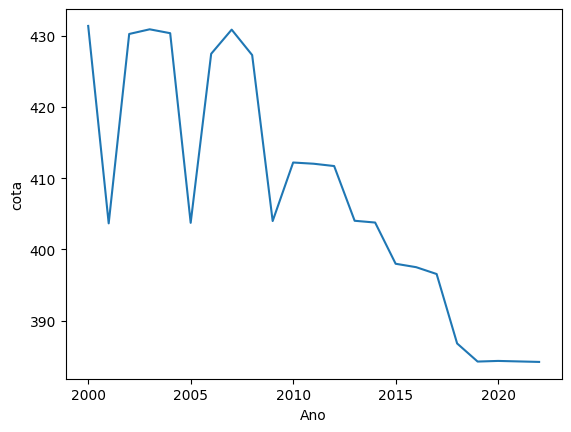

In [ ]:
sns.lineplot(x='Ano',y='cota',data=reservatorio.groupby('Ano').median().reset_index())

<Axes: xlabel='data', ylabel='cota'>

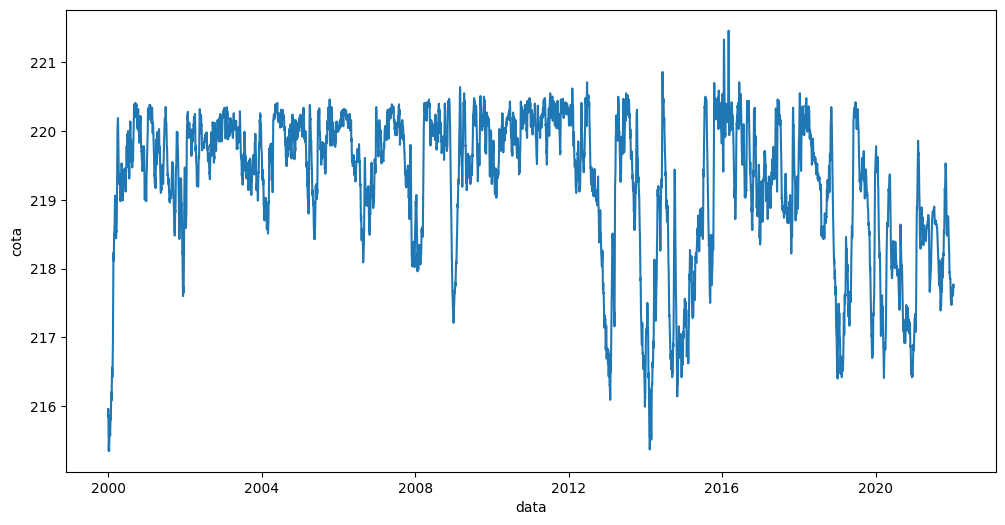

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='data',y='cota',data=reservatorio[reservatorio['nome_reservatorio']=='ITAIPU'])

In [ ]:
reservatorio.to_csv('Reservatorio Federal.csv')